$$
 \textbf{Projects in Machine Learning (ML) and Artificial Intelligence (AI)}
$$

 $$
 \textbf{CSCI 6967}
 $$

 $$
 \textbf{Homework 3}
 $$

# Data Selection:
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, it is not provided the original features and more background information about the data. Features V1, V2, …, V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## **Part 1(50 points)**
##**In this part you will implement a neural network from scratch. You cannot use any existing Deep Learning Framework. You can utilize NumPy and Pandas libraries to perform efficient calculations. Refer to Lecture 5 slides for details on computations required**

Write a Class called NeuralNetwork that has at least the following methods (you are free to add your own methods too):

a.
Initialization method.

b.
Forward propagation method that performs forward propagation calculations.

c.
Backward propagation method that implements the backpropagation algorithm
discussed in class.

d.
Train method that includes the code for gradient descent.

e.
Cost method that calculates the loss function.

f.
Predict method that calculates the predictions for the test set.

Test your NeuralNetwork Class with the dataset you selected. If the dataset is big, you may notice inefficiencies in runtime. Try incorporating different versions of gradient descent to improve that (Minibatch, Stochastic etc.). You may choose to use only a subset of your data for this task (or any other technique). Explain which technique you followed and why.

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import kagglehub
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/creditcard.csv'
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The type of backpropagation algorithm discussed in the class which is the "Notes_Backpropagation.pdf" is standard backpropagation using the chain rule of differentiation. This technique calculates the gradients necessary for updating parameters in neural networks by systematically applying the chain rule to propagate errors backward from the output towards the input layer. This approach is fundamental for training deep learning models efficiently and is widely used in both theoretical and applied settings in neural network training.

Batch gradient descent was chosen to optimize the neural network training process, utilizing just one hidden layer with two neurons. The process took only 1 minute and 35 seconds and achieved an accuracy of 99.83%. Although the accuracy and runtime is efficient, Mini-Batch and Stochastic Gradient Descent were also implemented for comparison, with results discussed at the end of Task 1.

**Batch Gradient Descent**

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.params = {}

        # Initialize weights and biases
        for i in range(1, len(layer_sizes)):
            self.params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1]) * 0.1
            self.params['b' + str(i)] = np.zeros((layer_sizes[i], 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward_propagation(self, X):
        cache = {'A0': X}
        A = X
        L = len(self.layer_sizes) - 1  # number of layers in the network
        for l in range(1, L+1):
            Z = self.params['W' + str(l)].dot(A) + self.params['b' + str(l)]
            A = self.sigmoid(Z)
            cache['A' + str(l)] = A
            cache['Z' + str(l)] = Z
        return A, cache

    def backward_propagation(self, y, cache):
        gradients = {}
        L = len(self.layer_sizes) - 1
        m = y.shape[1]
        y = y.reshape(cache['A' + str(L)].shape)

        # Calculate dAL
        dA_prev = - (np.divide(y, cache['A' + str(L)]) - np.divide(1 - y, 1 - cache['A' + str(L)]))

        for l in reversed(range(1, L+1)):
            dA_curr = dA_prev
            A_prev = cache['A' + str(l-1)]
            Z_curr = cache['Z' + str(l)]
            W_curr = self.params['W' + str(l)]
            b_curr = self.params['b' + str(l)]
            m = A_prev.shape[1]

            dZ_curr = dA_curr * self.sigmoid_derivative(Z_curr)
            dW_curr = np.dot(dZ_curr, A_prev.T) / m
            db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
            if l > 1:
                dA_prev = np.dot(W_curr.T, dZ_curr)

            gradients['dW' + str(l)] = dW_curr
            gradients['db' + str(l)] = db_curr

        return gradients

    def update_parameters(self, gradients):
        L = len(self.layer_sizes) - 1
        for l in range(1, L+1):
            self.params['W' + str(l)] -= self.learning_rate * gradients['dW' + str(l)]
            self.params['b' + str(l)] -= self.learning_rate * gradients['db' + str(l)]

    def train(self, X, y, epochs=1000):
        for i in range(epochs):
            output, cache = self.forward_propagation(X)
            cost = self.cost(output, y)
            gradients = self.backward_propagation(y, cache)
            self.update_parameters(gradients)
            if i % 100 == 0:
                print("Cost after iteration %i: %f" %(i, cost))

    def predict(self, X):
        output, _ = self.forward_propagation(X)
        predictions = output > 0.5
        return predictions

    def cost(self, output, y):
        m = y.shape[1]
        cost = -1/m * np.sum(y * np.log(output) + (1-y) * np.log(1-output))
        return cost

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocess the data
# 'Class' is the target variable and the rest are features
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1, 1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays for training
X_train, X_test, y_train, y_test = map(np.array, [X_train, X_test, y_train, y_test])

# Initialize the Neural Network
# We are using a simple network with one hidden layer (with 2 neurons)
nn = NeuralNetwork([X_train.shape[1], 2, 1], learning_rate=0.1)

# Train the Network
nn.train(X_train.T, y_train.T, epochs=1000)

# Evaluate the Model
predictions = nn.predict(X_test.T)
accuracy = np.mean(predictions == y_test.T)
print(f"Model accuracy: {accuracy * 100:.2f}%")

#### 1m and 35 seconds !!!!

Cost after iteration 0: 0.711362
Cost after iteration 100: 0.073378
Cost after iteration 200: 0.037904
Cost after iteration 300: 0.026549
Cost after iteration 400: 0.021121
Cost after iteration 500: 0.017989
Cost after iteration 600: 0.015971
Cost after iteration 700: 0.014573
Cost after iteration 800: 0.013551
Cost after iteration 900: 0.012775
Model accuracy: 99.83%


**Mini-Batch Gradient Descent**

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.params = {}

        # Initialize weights and biases
        for i in range(1, len(layer_sizes)):
            self.params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1]) * 0.1
            self.params['b' + str(i)] = np.zeros((layer_sizes[i], 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward_propagation(self, X):
        cache = {'A0': X}
        A = X
        L = len(self.layer_sizes) - 1
        for l in range(1, L+1):
            Z = self.params['W' + str(l)].dot(A) + self.params['b' + str(l)]
            A = self.sigmoid(Z)
            cache['A' + str(l)] = A
            cache['Z' + str(l)] = Z
        return A, cache

    def backward_propagation(self, y, cache):
        gradients = {}
        L = len(self.layer_sizes) - 1
        m = y.shape[1]
        y = y.reshape(cache['A' + str(L)].shape)
        dA_prev = - (np.divide(y, cache['A' + str(L)]) - np.divide(1 - y, 1 - cache['A' + str(L)]))
        for l in reversed(range(1, L+1)):
            dA_curr = dA_prev
            A_prev = cache['A' + str(l-1)]
            Z_curr = cache['Z' + str(l)]
            W_curr = self.params['W' + str(l)]
            b_curr = self.params['b' + str(l)]
            m = A_prev.shape[1]
            dZ_curr = dA_curr * self.sigmoid_derivative(Z_curr)
            dW_curr = np.dot(dZ_curr, A_prev.T) / m
            db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
            if l > 1:
                dA_prev = np.dot(W_curr.T, dZ_curr)
            gradients['dW' + str(l)] = dW_curr
            gradients['db' + str(l)] = db_curr
        return gradients

    def update_parameters(self, gradients):
        L = len(self.layer_sizes) - 1
        for l in range(1, L+1):
            self.params['W' + str(l)] -= self.learning_rate * gradients['dW' + str(l)]
            self.params['b' + str(l)] -= self.learning_rate * gradients['db' + str(l)]

    def train(self, X, y, epochs=1000, batch_size=64):
        n_samples = X.shape[1]
        n_batches = int(np.ceil(n_samples / batch_size))
        for i in range(epochs):
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[:, permutation]
            y_shuffled = y[:, permutation]
            for b in range(n_batches):
                start = b * batch_size
                end = min(start + batch_size, n_samples)
                X_batch = X_shuffled[:, start:end]
                y_batch = y_shuffled[:, start:end]
                output, cache = self.forward_propagation(X_batch)
                cost = self.cost(output, y_batch)
                gradients = self.backward_propagation(y_batch, cache)
                self.update_parameters(gradients)
            if i % 100 == 0:
                print("Cost after iteration %i: %f" %(i, cost))

    def predict(self, X):
        output, _ = self.forward_propagation(X)
        predictions = output > 0.5
        return predictions

    def cost(self, output, y):
        m = y.shape[1]
        cost = -1/m * np.sum(y * np.log(output) + (1-y) * np.log(1-output))
        return cost


In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocess the data
# 'Class' is the target variable and the rest are features
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1, 1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays for training
X_train, X_test, y_train, y_test = map(np.array, [X_train, X_test, y_train, y_test])

# Initialize the Neural Network
# We are using a simple network with one hidden layer
nn = NeuralNetwork([X_train.shape[1], 2, 1], learning_rate=0.1)

# Train the Network
nn.train(X_train.T, y_train.T, epochs=1000, batch_size=64)

# Evaluate the Model
predictions = nn.predict(X_test.T)
accuracy = np.mean(predictions == y_test.T)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Cost after iteration 0: 0.001938
Cost after iteration 100: 0.000184
Cost after iteration 200: 0.000038
Cost after iteration 300: 0.000214
Cost after iteration 400: 0.000253
Cost after iteration 500: 0.000229
Cost after iteration 600: 0.000334
Cost after iteration 700: 0.000151
Cost after iteration 800: 0.000426
Cost after iteration 900: 0.000014
Model accuracy: 99.94%


**Stochastic Gradient Descent**

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.params = {}

        # Initialize weights and biases
        for i in range(1, len(layer_sizes)):
            self.params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1]) * 0.1
            self.params['b' + str(i)] = np.zeros((layer_sizes[i], 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward_propagation(self, X):
        cache = {'A0': X}
        A = X
        L = len(self.layer_sizes) - 1
        for l in range(1, L+1):
            Z = self.params['W' + str(l)].dot(A) + self.params['b' + str(l)]
            A = self.sigmoid(Z)
            cache['A' + str(l)] = A
            cache['Z' + str(l)] = Z
        return A, cache

    def backward_propagation(self, y, cache):
        gradients = {}
        L = len(self.layer_sizes) - 1
        m = y.shape[1]
        y = y.reshape(cache['A' + str(L)].shape)

        dA_prev = - (np.divide(y, cache['A' + str(L)]) - np.divide(1 - y, 1 - cache['A' + str(L)]))
        for l in reversed(range(1, L+1)):
            dA_curr = dA_prev
            A_prev = cache['A' + str(l-1)]
            Z_curr = cache['Z' + str(l)]
            W_curr = self.params['W' + str(l)]
            b_curr = self.params['b' + str(l)]

            dZ_curr = dA_curr * self.sigmoid_derivative(Z_curr)
            dW_curr = np.dot(dZ_curr, A_prev.T) / m
            db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
            if l > 1:
                dA_prev = np.dot(W_curr.T, dZ_curr)

            gradients['dW' + str(l)] = dW_curr
            gradients['db' + str(l)] = db_curr

        return gradients

    def update_parameters(self, gradients):
        L = len(self.layer_sizes) - 1
        for l in range(1, L+1):
            self.params['W' + str(l)] -= self.learning_rate * gradients['dW' + str(l)]
            self.params['b' + str(l)] -= self.learning_rate * gradients['db' + str(l)]

    def train(self, X, y, epochs=1000):
        for i in range(epochs):
            for j in range(X.shape[1]):  # Loop through each example
                X_sample = X[:, j:j+1]
                y_sample = y[:, j:j+1]
                output, cache = self.forward_propagation(X_sample)
                cost = self.cost(output, y_sample)
                gradients = self.backward_propagation(y_sample, cache)
                self.update_parameters(gradients)  # Update parameters after each sample

            if i % 100 == 0:
                print("Cost after iteration %i: %f" % (i, cost))

    def predict(self, X):
        output, _ = self.forward_propagation(X)
        predictions = output > 0.5
        return predictions

    def cost(self, output, y):
        m = y.shape[1]
        cost = -1/m * np.sum(y * np.log(output) + (1-y) * np.log(1-output))
        return cost


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Preprocess the data
# Assume 'Class' is the target variable and the rest are features
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1, 1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays for training
X_train, X_test, y_train, y_test = map(np.array, [X_train, X_test, y_train, y_test])

# Initialize the Neural Network
# We are using a simple network with one hidden layer
nn = NeuralNetwork([X_train.shape[1], 2, 1], learning_rate=0.01)

The first iteration took 10 minutes to complete, so the process is not finished.

In [ ]:
# Train the Network
nn.train(X_train.T, y_train.T, epochs=1000)

# Evaluate the Model
predictions = nn.predict(X_test.T)
accuracy = np.mean(predictions == y_test.T)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Cost after iteration 0: 0.000043


**Results of Gradients Descents**

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Gradient Descent} & \textbf{Run Time} & \textbf{Accuracy} \\
\hline
\text{Batch} & \text{1 minute  35 seconds} & 99.83\% \\
\text{Mini-Batch} & \text{11 minutes} & 99.94\% \\
\text{Stochastic} & \text{Big} & -- \\
\hline
\end{array}
$$





*   Batch Gradient Descent: This method processes the entire dataset in one go to make a single update to the model's parameters per epoch. While this approach can be computationally expensive, especially for large datasets, it guarantees stable convergence and consistent updates. The high accuracy and relatively faster runtime (1m 35s) despite processing the entire dataset might be due to the simple architecture of the network (one hidden layer with 2 neurons), which doesn't demand as much computation per epoch. This can sometimes make full batch training feasible even for large datasets when the model complexity is low.

* Mini-Batch Gradient Descent: This splits the dataset into smaller batches, which reduces the variance in parameter updates compared to stochastic gradient descent while still being more computationally efficient than full batch gradient descent. The 11-minute runtime is longer than batch gradient descent due to the overhead of processing multiple batches per epoch, but it usually provides a good balance between the speed of stochastic and the precision of batch gradient descent. The slight increase in accuracy (99.94%) compared to batch gradient descent could be due to more frequent updates allowing better exploration of the parameter space.

* Stochastic Gradient Descent (SGD): Processes one training example at a time. This method is typically the slowest in terms of wall-clock time per epoch because it updates parameters much more frequently — once for every sample. While this can lead to faster convergence times in terms of epochs (since each epoch can make substantial changes to the model), it usually takes a lot of wall-clock time and can fluctuate greatly in terms of loss and accuracy. This method wasn't fully run due to the long computational time.

The differences in run times and accuracies can be influenced by many factors, including the initial parameter settings, the choice of learning rate, the complexity of the data and model, and the hardware used for training. Generally, mini-batch gradient descent is preferred for large datasets as it provides a good trade-off between the efficiency of SGD and the stability of batch gradient descent. The choice among these methods often comes down to specific data characteristics and computational resources.

##**Part 2 (50 points)**
##**In this part you will implement a 2-layer neural network using any Deep Learning Framework (e.g., TensorFlow, PyTorch etc.).**

**You should pick a Deep Learning Framework that you would like to use to implement your 2-layer Neural Network.**

##Task 1 (5 points): Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the framework (must include links to all resources). Clearly explain why you needed a particular resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)

For example, some of the known resources for TensorFlow and PyTorch are:

https://www.tensorflow.org/guide/autodiff

https://www.tensorflow.org/api_docs/python/tf/GradientTape

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Hint: You need to figure out the APIs/packages used to implement forward propagation and backward propagation.**



For this project, it was choosen PyTorch as the deep learning framework to implement the 2-layer neural network. PyTorch is known for its ease of use, flexibility, and efficient memory usage when building models.

Resources Used to Learn PyTorch:
1. PyTorch Tutorials - The official tutorials provided by PyTorch are cover the basics of model building, including setup, defining networks, and training loops.
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

 PyTorch Beginner Basics: This tutorial covers building a basic model, which is crucial for understanding how to construct a 2-layer NN.

2. PyTorch Documentation - The API documentation is essential for deep diving into specific functions and classes used for neural network construction, such as torch.nn for layers and torch.optim for optimization algorithms.

  (https://pytorch.org/docs/stable/generated/torch.nn.Module.html): Explains the building blocks for neural networks.

  (https://pytorch.org/docs/stable/optim.html): Details on various optimization algorithms like SGD, Adam, which are vital for training the neural network.

3. Gradient Computation - Understanding automatic differentiation is key in PyTorch for implementing backpropagation efficiently.

  (https://pytorch.org/docs/stable/notes/autograd.html) Autograd Mechanics: This document provides insights into how PyTorch computes gradients automatically, which is crucial for backpropagation in a 2-layer NN.

These resources are critical for learning to use PyTorch for a few reasons:
* They provide a clear and structured way to understand the framework from the
 ground up.

* Detailed API documentation helps in utilizing the full capabilities of the framework for neural network development and training.
Tutorials and guides are practical for hands-on learning and directly applicable to the task of building and training neural networks.

## Task 2 (35 points): Once you have figured out the resources you need for the project, you should design and implement your project. The project must include the following steps (it’s not limited to these steps):

1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)

2. Perform a train-dev-test split.

3. Implement forward propagation (clearly describe the activation functions and other hyper-parameters you are using).

4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your data and project can be used) to train your model. In this step it is up to you as someone in charge of their project to improvise using optimization algorithms (Adams, RMSProp etc.) and/or regularization. Experiment with normalized inputs i.e. comment on how your model performs when the inputs are normalized.

6. Present the results using the test set.

NOTE: In this step, once you have implemented your 2-layer network you may increase and/or decrease the number of layers as part of the hyperparameter tuning process.

**Step 1: Exploratory Data Analysis (Can include data cleaning, visualization etc.)**

In [ ]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data Cleaning

In [ ]:
df=df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
# Basic info about data: such as missing values, its percentages, unique value counts and data types
basic_info = pd.DataFrame({
    "Features": df.columns,
    "Missing Values": df.isnull().sum(),
    "Missing Values[%]": round((df.isnull().sum())/len(df)*100, 1),
    "Unique Counts": df.nunique(),
    "Data Types": df.dtypes
})
basic_info

,Features,Missing Values,Missing Values[%],Unique Counts,Data Types
V1,V1,0,0.0,275663,float64
V2,V2,0,0.0,275663,float64
V3,V3,0,0.0,275663,float64
V4,V4,0,0.0,275663,float64
V5,V5,0,0.0,275663,float64
V6,V6,0,0.0,275663,float64
V7,V7,0,0.0,275663,float64
V8,V8,0,0.0,275663,float64
V9,V9,0,0.0,275663,float64
V10,V10,0,0.0,275663,float64


There is a huge disproportion in data. Only 0,17% is a fraud data.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

sns.set()
%matplotlib inline

In [ ]:
len(df[df['Class'] == 1])

492

In [ ]:
len(df[df['Class'] == 0])

284315

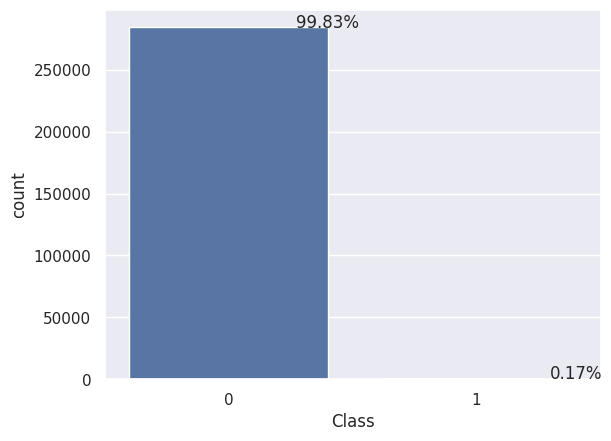

In [ ]:
ax = sns.countplot(x='Class',data=df)
total = float(len(df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

Transactions amount

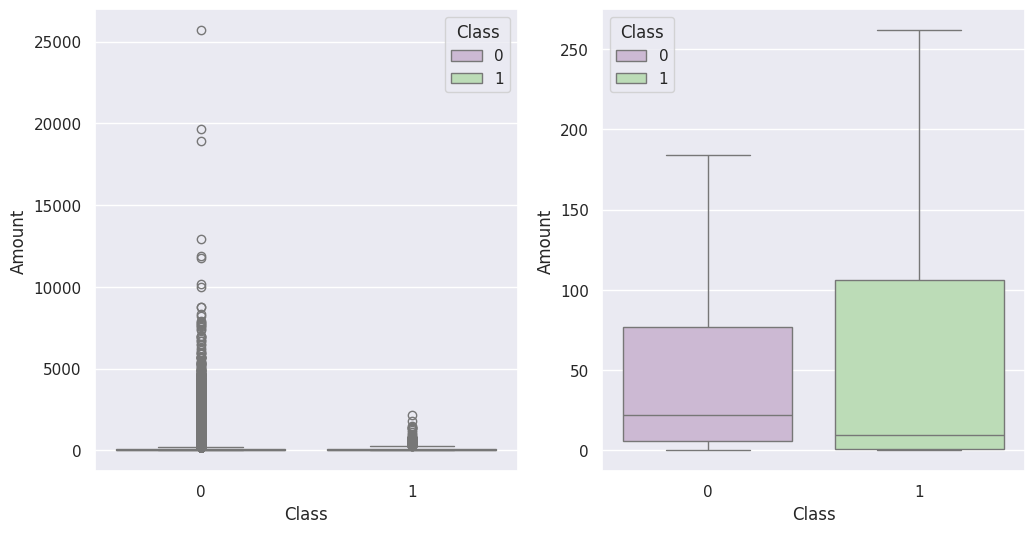

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

Correlation between features (Important features, histograms, heatmaps)

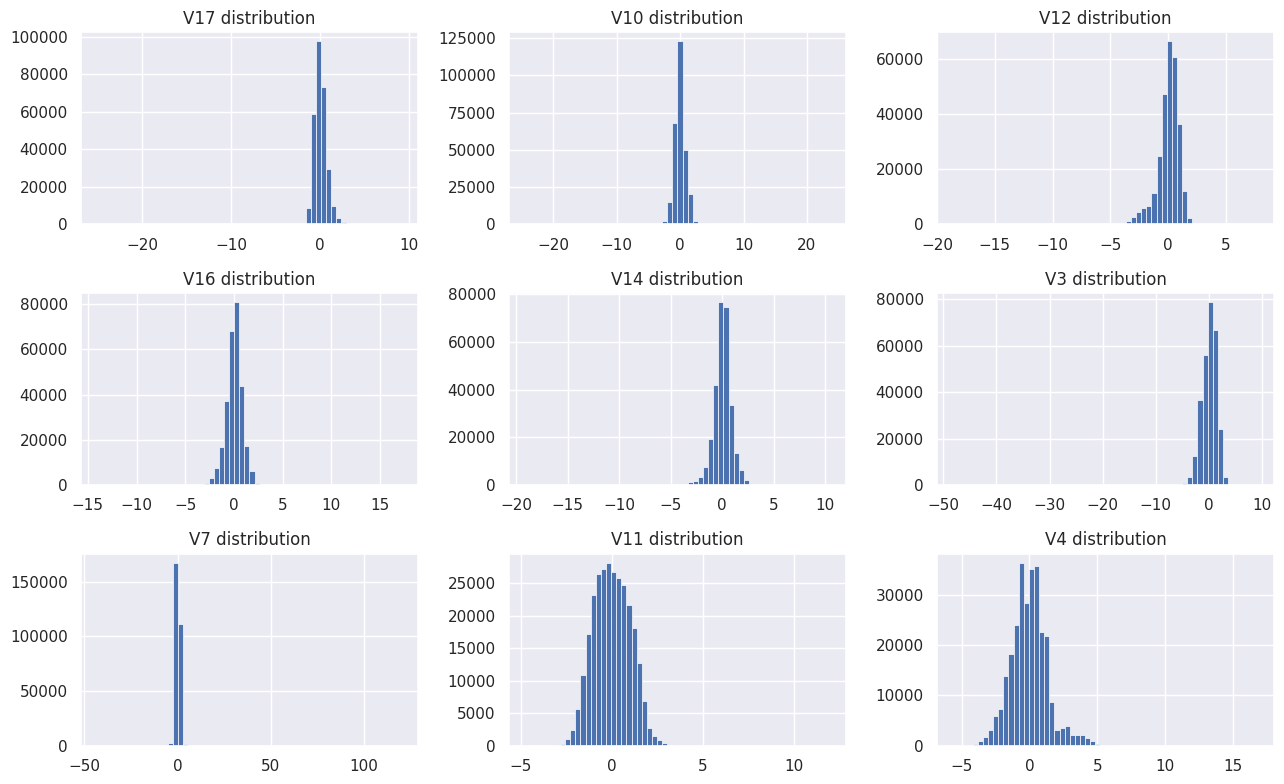

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

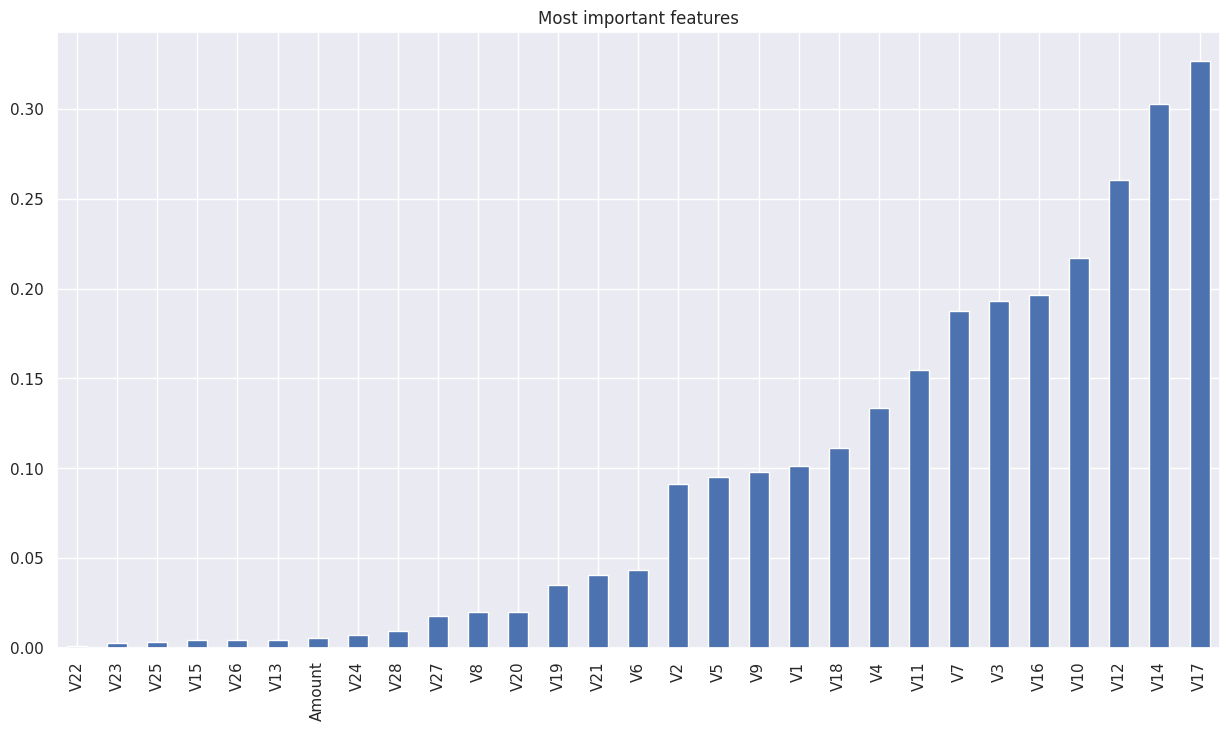

In [ ]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')
plt.show()

In [ ]:
# Let's peak all features with correlation 0.15 and more
c = df.corr()['Class'][:-1].abs() > 0.15
print (c)

V1        False
V2        False
V3         True
V4        False
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


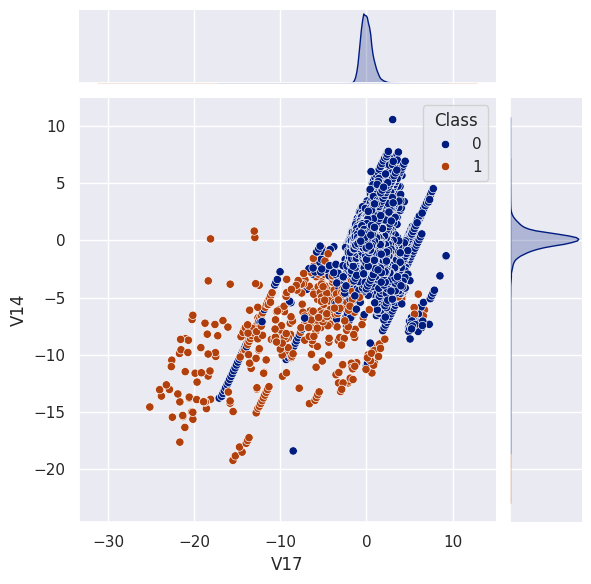

In [ ]:
sns.jointplot(x='V17', y='V14',hue='Class', data=df, palette = 'dark')

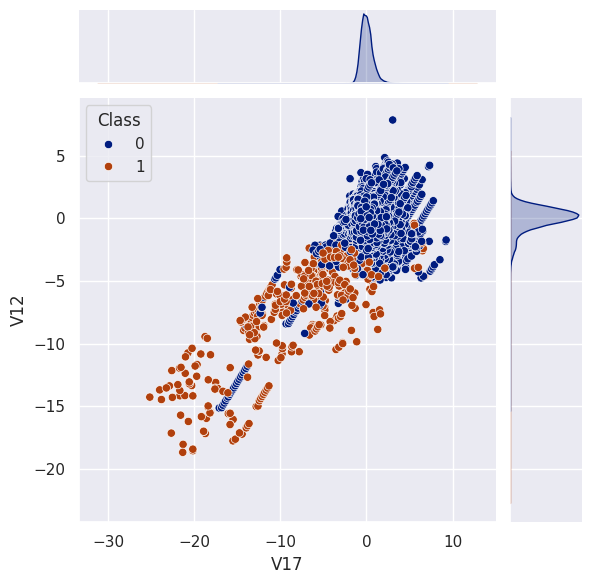

In [ ]:
sns.jointplot(x='V17', y='V12',hue='Class', data=df, palette = 'dark')

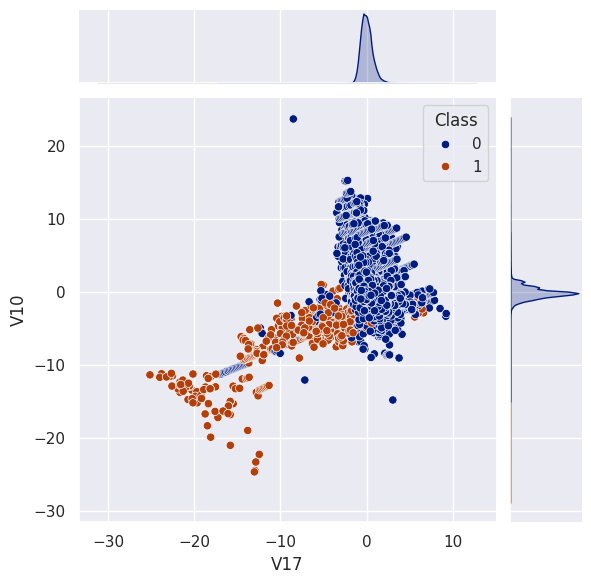

In [ ]:
sns.jointplot(x='V17', y='V10',hue='Class', data=df, palette = 'dark')

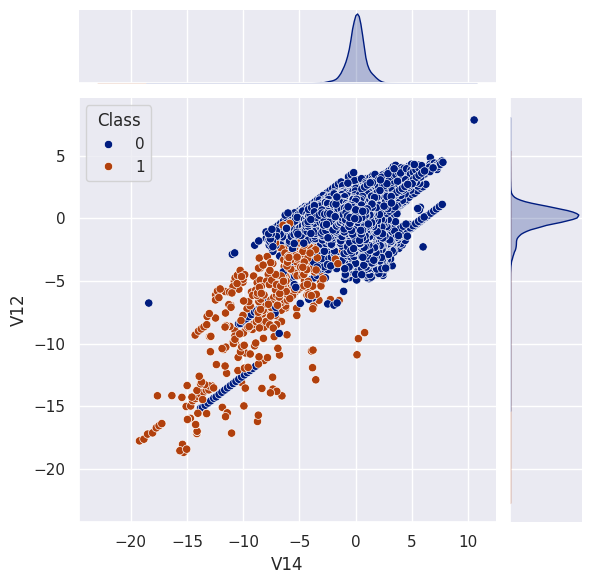

In [ ]:
sns.jointplot(x='V14', y='V12',hue='Class', data=df, palette = 'dark')

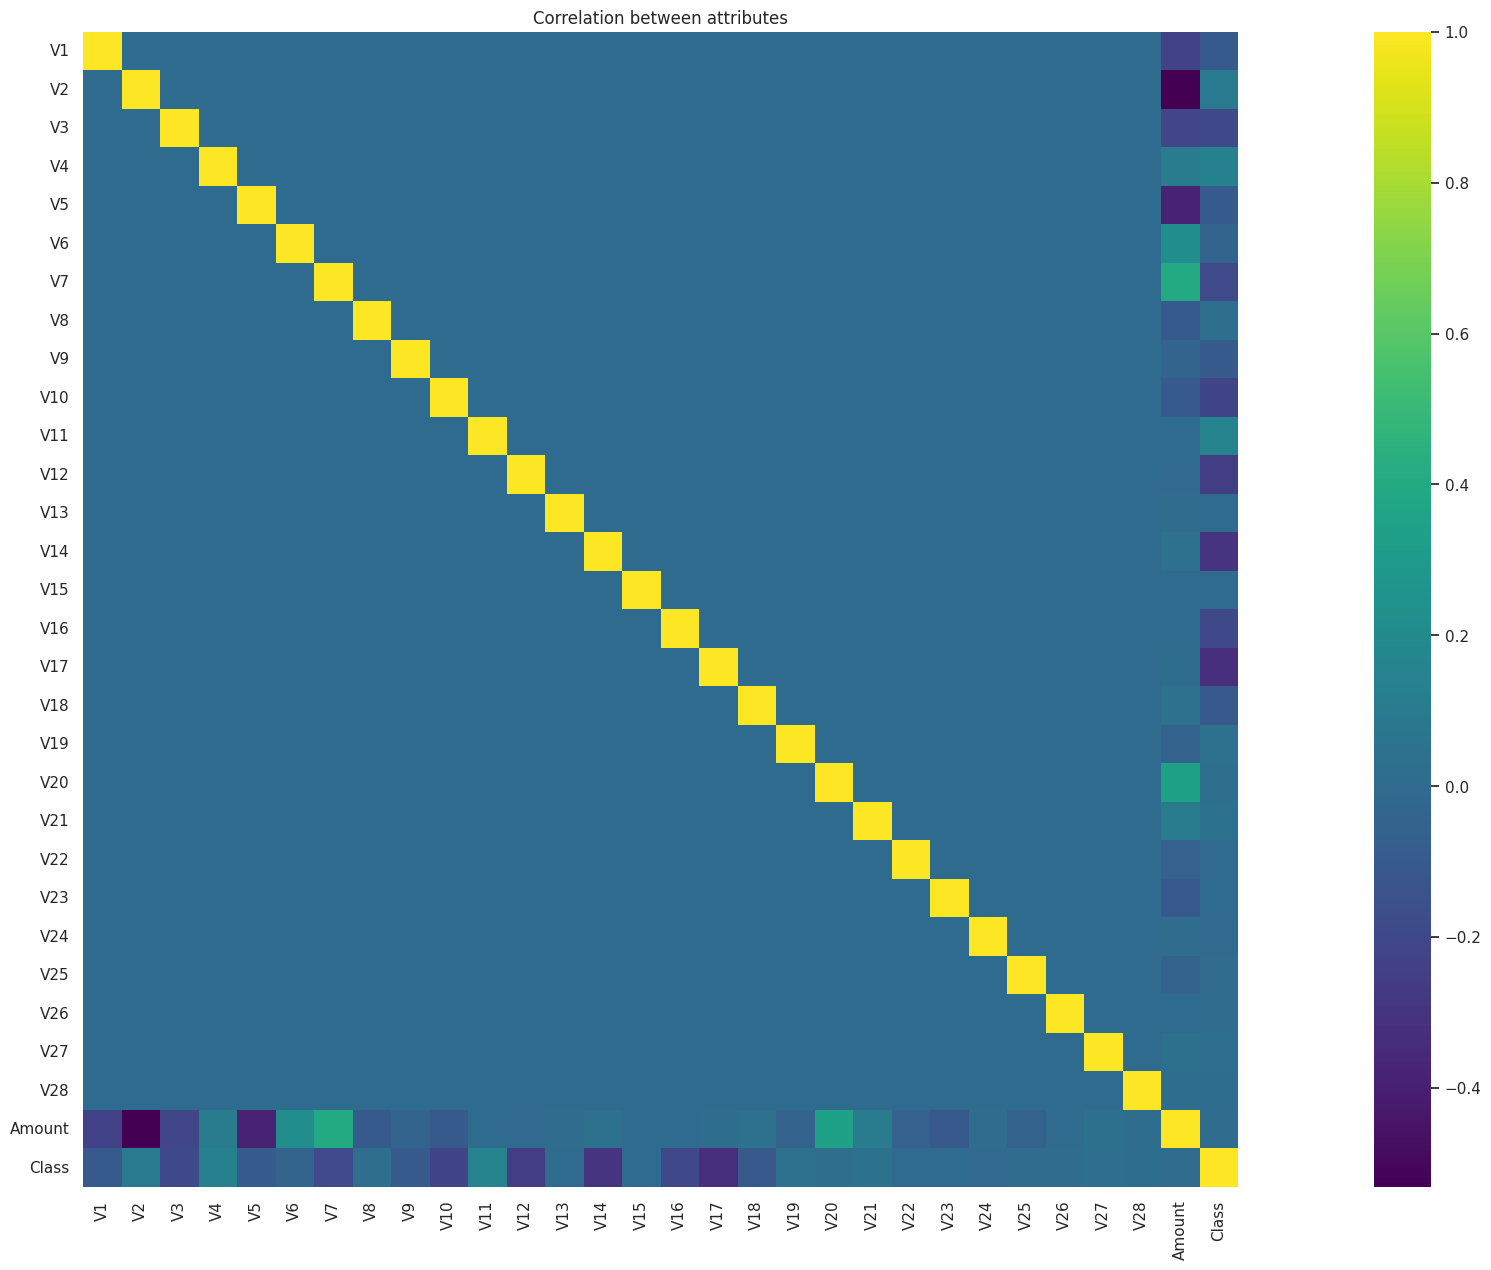

In [ ]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1,square=True,annot=False,cmap='viridis')
plt.title('Correlation between attributes')
plt.show()

I initially started with Adam as my optimization algorithm because it is widely considered a robust and efficient optimizer that combines the advantages of momentum and adaptive learning rates (from RMSprop). Adam tends to perform well in most scenarios, making it a strong default choice for training neural networks.

After testing Adam, I experimented with RMSprop to compare its performance. RMSprop is designed to work well with non-stationary objectives and adaptively adjusts learning rates, which can be useful in complex datasets. By testing both optimizers, I ensured that my model was not overly dependent on a single optimization approach.

**Adam Optimizer**

In [ ]:
### ----------- Step 2: Perform a train-dev-test split ------------ ###
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# df is the DataFrame and 'Class' is tbe label column
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to PyTorch tensors and add an extra dimension to y tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


### ----------- Step 3: Implement Forward Propagation ------------ ###
import torch.nn as nn
import torch.nn.functional as F

class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Using ReLU activation function for hidden layer F.relu - torch.sigmoid
        x = torch.sigmoid(self.fc2(x))  # Using sigmoid for the output layer since it's a binary classification
        return x

#Initialize model
model = TwoLayerNet(input_size=X_train.shape[1], hidden_size=2, output_size=1)

### ----------- Step 4: Compute the Final Cost Function ------------ ###
criterion = nn.BCELoss()

### ----------- Step 5: Train the Neural Network ------------ ###
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, criterion, optimizer, epochs, X_train, y_train, X_val, y_val):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # Calculate and print loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs, y_val)
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

train_model(model, criterion, optimizer, 1000, X_train, y_train, X_val, y_val)

### ----------- Step 6: Present the results using the test set ------------ ###
def evaluate_model(model, criterion, X_test, y_test, batch_size=64):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            X_batch = X_test[i:i+batch_size]
            y_batch = y_test[i:i+batch_size]
            outputs = model(X_batch)
            test_loss += criterion(outputs, y_batch).item()
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted.flatten() == y_batch.flatten()).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss / (len(X_test) / batch_size):.4f}, Test Accuracy: {accuracy:.2f}%')
evaluate_model(model, criterion, X_test, y_test)


Epoch 100/1000, Loss: 1.0324, Val Loss: 1.0315
Epoch 200/1000, Loss: 0.9621, Val Loss: 0.9615
Epoch 300/1000, Loss: 0.9044, Val Loss: 0.9038
Epoch 400/1000, Loss: 0.8498, Val Loss: 0.8492
Epoch 500/1000, Loss: 0.7982, Val Loss: 0.7977
Epoch 600/1000, Loss: 0.7496, Val Loss: 0.7491
Epoch 700/1000, Loss: 0.7040, Val Loss: 0.7035
Epoch 800/1000, Loss: 0.6611, Val Loss: 0.6606
Epoch 900/1000, Loss: 0.6209, Val Loss: 0.6205
Epoch 1000/1000, Loss: 0.5833, Val Loss: 0.5829
Test Loss: 0.5835, Test Accuracy: 99.94%


**RMSPROP Optimizer**

In [ ]:
import torch.optim as optim

# Use RMSProp optimizer
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Training loop remains the same
def train_model(model, criterion, optimizer, epochs, X_train, y_train, X_val, y_val):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs, y_val)
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

train_model(model, criterion, optimizer, 1000, X_train, y_train, X_val, y_val)

#-------------------------------------------
def evaluate_model(model, criterion, X_test, y_test, batch_size=64):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            X_batch = X_test[i:i+batch_size]
            y_batch = y_test[i:i+batch_size]
            outputs = model(X_batch)
            test_loss += criterion(outputs, y_batch).item()
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted.flatten() == y_batch.flatten()).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss / (len(X_test) / batch_size):.4f}, Test Accuracy: {accuracy:.2f}%')
evaluate_model(model, criterion, X_test, y_test)

Epoch 100/1000, Loss: 0.1347, Val Loss: 0.1341
Epoch 200/1000, Loss: 0.1019, Val Loss: 0.1018
Epoch 300/1000, Loss: 0.0786, Val Loss: 0.0788
Epoch 400/1000, Loss: 0.0625, Val Loss: 0.0628
Epoch 500/1000, Loss: 0.0507, Val Loss: 0.0512
Epoch 600/1000, Loss: 0.0423, Val Loss: 0.0428
Epoch 700/1000, Loss: 0.0371, Val Loss: 0.0376
Epoch 800/1000, Loss: 0.0333, Val Loss: 0.0337
Epoch 900/1000, Loss: 0.0301, Val Loss: 0.0305
Epoch 1000/1000, Loss: 0.0273, Val Loss: 0.0278
Test Loss: 0.0268, Test Accuracy: 99.94%


Τhe accuracy of Adam and RMSprop is the same. This is possibly reasonable, as both Adam and RMSprop are adaptive optimization algorithms that adjust the learning rate based on past gradients. Since they optimize weight updates in a similar manner, they can converge to similar solutions, leading to almost identical accuracy. The small variations are due to different internal parameter updates and learning rate adjustments.

Additionally, since the performance is very high, there is no need to apply regularization or change the number of layers as part of the hyperparameter tuning process.

In [ ]:
import torch.optim as optim

# Initialize the optimizer with weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # weight_decay is the L2 penalty

# The rest of your training function remains the same
def train_model(model, criterion, optimizer, epochs, X_train, y_train, X_val, y_val):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs, y_val)
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

train_model(model, criterion, optimizer, 1000, X_train, y_train, X_val, y_val)

def evaluate_model(model, criterion, X_test, y_test, batch_size=64):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            X_batch = X_test[i:i+batch_size]
            y_batch = y_test[i:i+batch_size]
            outputs = model(X_batch)
            test_loss += criterion(outputs, y_batch).item()
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted.flatten() == y_batch.flatten()).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss / (len(X_test) / batch_size):.4f}, Test Accuracy: {accuracy:.2f}%')

evaluate_model(model, criterion, X_test, y_test)


Epoch 100/1000, Loss: 0.0334, Val Loss: 0.0363
Epoch 200/1000, Loss: 0.0333, Val Loss: 0.0362
Epoch 300/1000, Loss: 0.0333, Val Loss: 0.0361
Epoch 400/1000, Loss: 0.0333, Val Loss: 0.0361
Epoch 500/1000, Loss: 0.0333, Val Loss: 0.0361
Epoch 600/1000, Loss: 0.0333, Val Loss: 0.0362
Epoch 700/1000, Loss: 0.0333, Val Loss: 0.0361
Epoch 800/1000, Loss: 0.0332, Val Loss: 0.0361
Epoch 900/1000, Loss: 0.0332, Val Loss: 0.0361
Epoch 1000/1000, Loss: 0.0332, Val Loss: 0.0361
Test Loss: 0.0259, Test Accuracy: 99.84%


**Hyperparameter Tuning - Layer Increase**

Increasing the number of layers to 5 as part of the hyperparameter tuning process resulted in a slight decrease in accuracy. Using the Adam optimizer, the model with 5 layers achieved 99.92% accuracy, indicating that additional layers do not improve performance and may introduce unnecessary complexity.

In [ ]:
### ----------- Step 2: Perform a train-dev-test split ------------ ###
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# df is the DataFrame and 'Class' is tbe label column
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to PyTorch tensors and add an extra dimension to y tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


### ----------- Step 3: Implement Forward Propagation ------------ ###
import torch.nn as nn
import torch.nn.functional as F

class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Using ReLU activation function for hidden layer F.relu - torch.sigmoid
        x = torch.sigmoid(self.fc2(x))  # Using sigmoid for the output layer since it's a binary classification
        return x

#Initialize model
model = TwoLayerNet(input_size=X_train.shape[1], hidden_size=5, output_size=1)

### ----------- Step 4: Compute the Final Cost Function ------------ ###
criterion = nn.BCELoss()

### ----------- Step 5: Train the Neural Network ------------ ###
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, criterion, optimizer, epochs, X_train, y_train, X_val, y_val):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # Calculate and print loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs, y_val)
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

train_model(model, criterion, optimizer, 1000, X_train, y_train, X_val, y_val)

### ----------- Step 6: Present the results using the test set ------------ ###
def evaluate_model(model, criterion, X_test, y_test, batch_size=64):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            X_batch = X_test[i:i+batch_size]
            y_batch = y_test[i:i+batch_size]
            outputs = model(X_batch)
            test_loss += criterion(outputs, y_batch).item()
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted.flatten() == y_batch.flatten()).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss / (len(X_test) / batch_size):.4f}, Test Accuracy: {accuracy:.2f}%')
evaluate_model(model, criterion, X_test, y_test)


Epoch 100/1000, Loss: 0.5548, Val Loss: 0.5521
Epoch 200/1000, Loss: 0.3339, Val Loss: 0.3320
Epoch 300/1000, Loss: 0.1929, Val Loss: 0.1918
Epoch 400/1000, Loss: 0.1160, Val Loss: 0.1155
Epoch 500/1000, Loss: 0.0757, Val Loss: 0.0755
Epoch 600/1000, Loss: 0.0532, Val Loss: 0.0532
Epoch 700/1000, Loss: 0.0396, Val Loss: 0.0398
Epoch 800/1000, Loss: 0.0308, Val Loss: 0.0311
Epoch 900/1000, Loss: 0.0248, Val Loss: 0.0252
Epoch 1000/1000, Loss: 0.0205, Val Loss: 0.0210
Test Loss: 0.0200, Test Accuracy: 99.92%


##Task 3 (10 points): In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use an optimization algorithm? Why or why not?

The hyperparameters in this neural network were selected based on experimental tuning and performance evaluation on validation data.

* Learning Rate (0.001): The learning rate for the optimizer was set initially based on common starting points suggested in literature, such as 0.001 for Adam. This rate is a compromise between speed of convergence and the risk of overshooting minima in the loss landscape.

* Number of Hidden Layers and Neurons (1 layer, 2 neurons): A minimal architecture was initially tested since the dataset is preprocessed using PCA, meaning the features are already transformed into a lower-dimensional space.   Increasing to 5 layers slightly lowered accuracy (99.92% with Adam), showing additional layers add complexity without improvement.

* Activation Functions: ReLU was used for the hidden layer to introduce non-linearity and improve gradient propagation, while a sigmoid function was used in the output layer for binary classification.

* Loss Function (BCELoss): Since the problem is a binary classification task, Binary Cross-Entropy Loss (BCELoss) was selected to measure the difference between predicted and actual probabilities.

* Optimization Algorithm (Adam): Adam was chosen due to its adaptive learning rate and efficiency in handling noisy gradients. Later, RMSprop was also tested to compare optimization performance, but both yielded similar results.

* Epochs (1000): The model was trained for 1000 epochs, with validation loss being monitored every 100 epochs. Since no significant increase in validation loss was observed, overfitting was not a concern, making additional regularization unnecessary.

* Regularization: No explicit regularization (L1, L2, or dropout) was applied because the model already achieved high accuracy (99.94%) with stable validation loss. Applying regularization in this case would not yield significant improvements.

Overall, the hyperparameters were chosen based on iterative experimentation, monitoring loss values, and balancing training time with accuracy.


In Task 2, the selection and tuning of hyperparameters were driven by a focus on achieving a balance between model complexity and performance while avoiding overfitting. The learning rate of 0.001 for the Adam optimizer was chosen based on its popularity and effectiveness in various applications, providing a good starting point for convergence without being too aggressive. Adam was selected as the optimizer because of its efficiency in handling sparse gradients and adaptive learning rate capabilities, making it suitable for this dataset.

No explicit regularization techniques like dropout or L2 regularization were applied in the initial model configuration. This decision was made to first evaluate the baseline performance of the network without additional complexity, ensuring that any fundamental issues with model architecture or data handling could be identified and addressed. Regularization might be considered in subsequent iterations, especially if overfitting is observed during training or validation phases. This approach allows for a clear assessment of the impact of each model component and hyperparameter on performance, facilitating systematic optimization based on empirical results.



---



---



---



---



---



##Task 4 (100 points): Create another baseline model (can be any model we covered so far except a deep learning model). Using the same training data (as above) train your model and evaluate results using the test set. Compare the results of both models (the Neural Network and the baseline model). What are the reasons for one model performing better (or not) than the other? Explain.

Given the class imbalance ratio, it is recommended measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# 'Class' is the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Area Under the Precision-Recall Curve (AUPRC): 0.7891


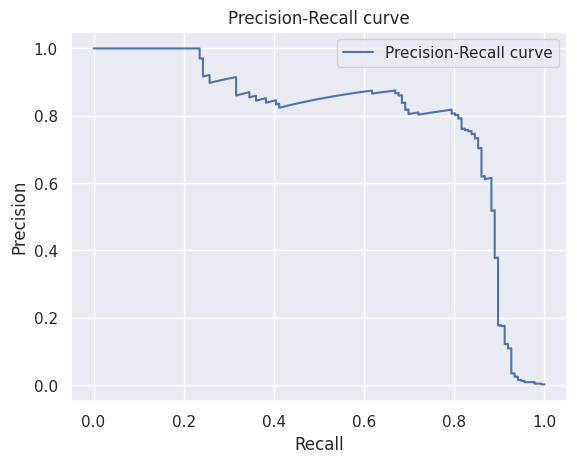

In [ ]:
### ---------------------- Step 1: Data Preparation ----------------------- ###

# 'Class' is the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### ------------- Step 2: Train the Logistic Regression Model ------------- ###
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

### -------------------- Step 3: Evaluate Using AUPRC --------------------- ###

# Predict probabilities
y_scores = logreg.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate AUPRC
auprc = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="upper right")
plt.show()


In [ ]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.62      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



**Baseline Model (Logistic Regression) Results**
* AUPRC: 0.7891
* Precision-Recall Performance:
  * Class 0: Precision = 1.00, Recall = 1.00
  * Class 1: Precision = 0.87, Recall = 0.62
* Overall Accuracy: 100% (Misleading due to class imbalance)

**Neural Network (2-Layer) Results:**
* Achieved an accuracy of 99.94%
* More robust learning of complex patterns due to non-linearity
* Likely better generalization due to deep learning adaptability

**Comparison and Explanation:**
* Neural Network outperforms logistic regression because it can capture non-linear relationships in the data, whereas logistic regression is inherently linear.
* The AUPRC of 0.7891 for logistic regression suggests that while it performs well for the majority class (non-fraudulent transactions), it struggles with recall for fraud detection (only 62% recall for Class 1).
* NN shows better generalization but should be further evaluated for potential overfitting.

Thus, the neural network is a better choice for this problem, as it better captures fraud patterns, which are inherently non-linear.